<a href="https://colab.research.google.com/github/ravi-kiran-iiml/my_git/blob/master/pima_indian_diabetes_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

brief about this dataset

https://www.kaggle.com/uciml/pima-indians-diabetes-database

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
  from google.colab import files
  uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(460, 8) (308, 8)
(460, 1) (308, 1)


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [21]:
history = model.fit(x_train, y_train, epochs = 150, batch_size = 20, validation_data=(x_test, y_test))

Train on 460 samples, validate on 308 samples
Epoch 1/150
460/460 [==============================] - 0s 292us/step - loss: 0.6321 - accuracy: 0.7065 - val_loss: 0.6027 - val_accuracy: 0.7013
Epoch 2/150
460/460 [==============================] - 0s 99us/step - loss: 0.5394 - accuracy: 0.7739 - val_loss: 0.5469 - val_accuracy: 0.7338
Epoch 3/150
460/460 [==============================] - 0s 92us/step - loss: 0.4839 - accuracy: 0.7870 - val_loss: 0.5248 - val_accuracy: 0.7500
Epoch 4/150
460/460 [==============================] - 0s 90us/step - loss: 0.4550 - accuracy: 0.7848 - val_loss: 0.5137 - val_accuracy: 0.7565
Epoch 5/150
460/460 [==============================] - 0s 89us/step - loss: 0.4394 - accuracy: 0.7957 - val_loss: 0.5114 - val_accuracy: 0.7565
Epoch 6/150
460/460 [==============================] - 0s 87us/step - loss: 0.4300 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.7597
Epoch 7/150
460/460 [==============================] - 0s 85us/step - loss: 0.4208 - accu

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

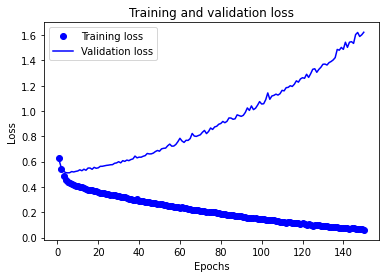

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

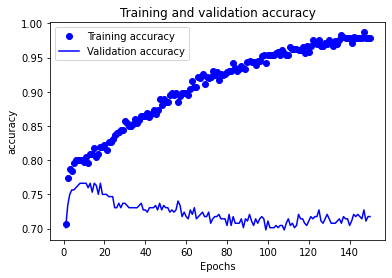

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [18]:
print(model.evaluate(x_train, y_train))

460/460 [==============================] - 0s 32us/step
[0.2901589305504509, 0.8782608509063721]


In [17]:
print(model.evaluate(x_test, y_test))

308/308 [==============================] - 0s 52us/step
[0.7016488011781271, 0.7110389471054077]


In [19]:
print(model.predict(x_test))

[[1.69620484e-01]
 [7.50722170e-01]
 [1.82084143e-01]
 [5.28749824e-03]
 [9.07972455e-03]
 [5.18974662e-03]
 [7.42929816e-01]
 [6.67923748e-01]
 [3.85522842e-04]
 [6.36911094e-02]
 [4.58740851e-06]
 [4.51965362e-01]
 [2.69429088e-01]
 [9.42166328e-01]
 [3.59529257e-02]
 [1.55063063e-01]
 [9.95481849e-01]
 [1.64237112e-01]
 [9.31473970e-01]
 [4.63412970e-01]
 [4.88756537e-01]
 [5.78805804e-02]
 [7.08954573e-01]
 [9.37288642e-01]
 [8.88998866e-01]
 [5.25395274e-01]
 [4.73007560e-03]
 [1.14108324e-02]
 [1.76256925e-01]
 [7.32829452e-01]
 [3.63022089e-02]
 [6.29827678e-02]
 [2.25141346e-02]
 [8.17103982e-01]
 [2.58961320e-03]
 [1.09886229e-02]
 [9.50186729e-01]
 [1.20604545e-05]
 [9.74092364e-01]
 [1.15042627e-02]
 [2.00701654e-02]
 [2.89745986e-01]
 [6.73353851e-01]
 [6.01305902e-01]
 [5.78267694e-01]
 [5.41762829e-01]
 [6.20743811e-01]
 [6.22905850e-01]
 [6.63700700e-03]
 [1.31097436e-03]
 [4.44579422e-02]
 [6.22258067e-01]
 [4.28772580e-07]
 [7.66218185e-01]
 [9.72067833e-01]
 [8.432688